In [1]:
import pandas as pd
import numpy as np
import anndata
import scanpy as sc
import bbknn

In [2]:
infile = '../so_original/so_comb.csv'
df_comb = pd.read_csv(infile, index_col=0).T
df_comb.head()

,Xkr4,Mrpl15,Lypla1,Gm37988,Tcea1,Rgs20,Atp6v1h,Oprk1,Npbwr1,Rb1cc1,...,Sec31b,Gm20395,Pitx3,Gm26792,Gm6970,Tectb,Habp2,Vwa2,E330013P04Rik,AC132444.6
s1_AAACCTGAGCATCATC,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
s1_AAACCTGGTAGCCTCG,0,1,0,0,1,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
s1_AAACCTGGTCTAGTCA,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
s1_AAACCTGGTGTTAAGA,0,2,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
s1_AAACGGGAGCTCCCAG,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
infile = '../so_original/so_comb_celltype.csv'
df_comb_obs = pd.read_csv(infile, index_col=0)
df_comb_obs.head()

,celltype
bc,
s1_AAACCTGAGCATCATC,LMCm
s1_AAACCTGGTAGCCTCG,MMC
s1_AAACCTGGTCTAGTCA,V2IN
s1_AAACCTGGTGTTAAGA,V3IN
s1_AAACGGGAGCTCCCAG,PGC.Isl1-


In [4]:
ad_comb = anndata.AnnData(df_comb, obs=df_comb_obs)

In [5]:
categories = ['pMN', 'nbMN', 'MMC', 'MMC.Zfhx4+', 'HMC', 'LMCm', 'LMCl', 'LMCd', 'PGC.Isl1+', 'PGC.Isl1-', 'V2IN', 'V3IN', 'ND']
ad_comb.obs['celltype'] = pd.Categorical(ad_comb.obs['celltype'], ordered=True, categories=categories)
ad_comb.uns['celltype_colors'] = ['#027222', '#00FF00', '#e87929', '#f79a2a', '#774507', '#800080', '#f97a91', '#ffd1d9', '#0021ff', '#add8e6', '#ccccce', '#6a6a6d', '#070707']

In [6]:
ad_comb.uns['count'] = ad_comb.X

In [7]:
ad_comb

AnnData object with n_obs × n_vars = 6298 × 17774
    obs: 'celltype'
    uns: 'celltype_colors', 'count'

In [8]:
ad_comb.uns['count'][:4,:4]

array([[0., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 2., 1., 0.]], dtype=float32)

In [9]:
ad_comb.uns['count'].shape

(6298, 17774)

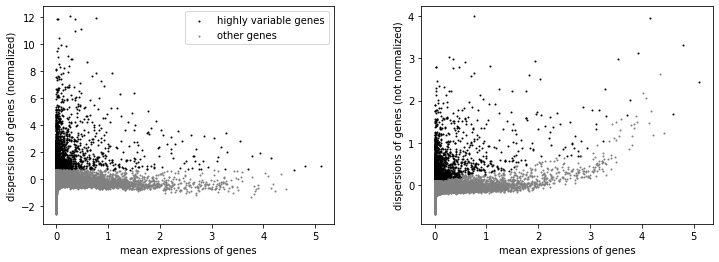

In [10]:
sc.pp.normalize_total(ad_comb, target_sum=10000)
sc.pp.log1p(ad_comb)
sc.pp.highly_variable_genes(ad_comb, min_disp=0.3,inplace=True, n_top_genes=2000)
sc.pl.highly_variable_genes(ad_comb)
sc.pp.scale(ad_comb, max_value=10)

In [11]:
ad_comb

AnnData object with n_obs × n_vars = 6298 × 17774
    obs: 'celltype'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'celltype_colors', 'count', 'log1p', 'hvg'

/home/groups/precepts/chhy/anaconda3/envs/cuda_11/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


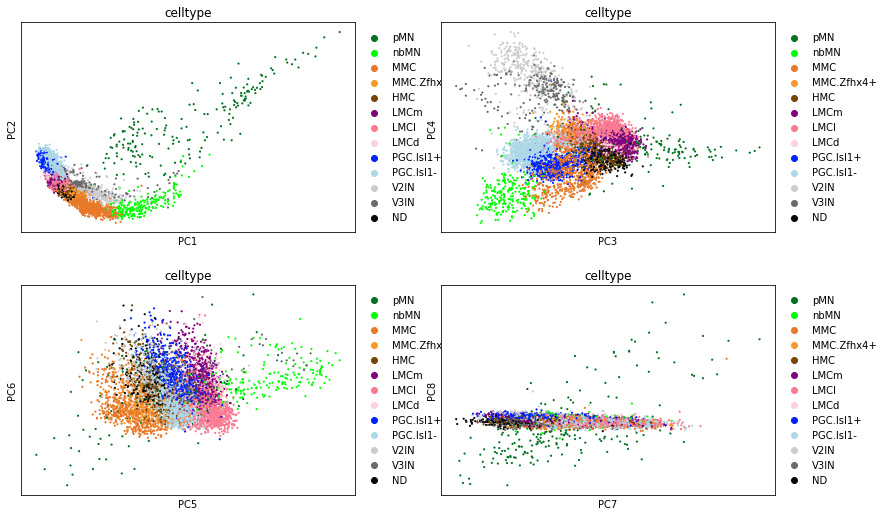

In [12]:
sc.tl.pca(ad_comb)
sc.pl.pca(ad_comb, color='celltype',components = ['1,2','3,4','5,6','7,8'], ncols=2)

In [13]:
ad_comb.uns['log1p']

{'base': None}

In [14]:
nUMI = np.sum(df_comb, axis=1)

In [15]:
nUMI.head()

s1_AAACCTGAGCATCATC    16542
s1_AAACCTGGTAGCCTCG    13276
s1_AAACCTGGTCTAGTCA     7374
s1_AAACCTGGTGTTAAGA    14889
s1_AAACGGGAGCTCCCAG     9973
dtype: int64

In [16]:
ad_comb.obs['nUMI'] = nUMI

/home/groups/precepts/chhy/anaconda3/envs/cuda_11/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


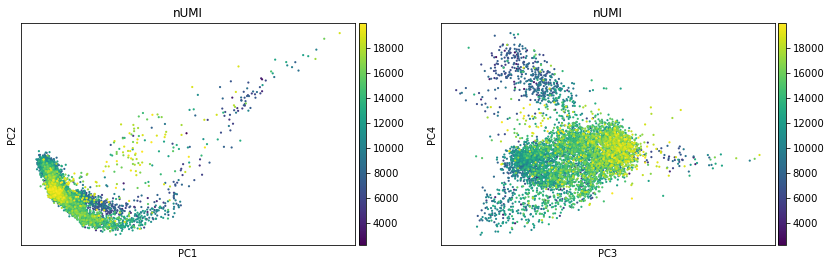

In [17]:
sc.tl.pca(ad_comb)
sc.pl.pca(ad_comb, color='nUMI',components = ['1,2','3,4'], ncols=2)

In [18]:
ad_comb

AnnData object with n_obs × n_vars = 6298 × 17774
    obs: 'celltype', 'nUMI'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'celltype_colors', 'count', 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

## PCA analysis for whole cells

In [19]:
infile = '../so_original/so_ctr_all.csv'
df_ctr = pd.read_csv(infile, index_col=0).T

In [20]:
df_ctr.head()

,Xkr4,Mrpl15,Lypla1,Gm37988,Tcea1,Rgs20,Atp6v1h,Oprk1,Npbwr1,Rb1cc1,...,mt-Nd6,mt-Cytb,Vamp7,Spry3,Tmlhe,Csprs,AC168977.1,PISD,DHRSX,CAAA01147332.1
AAACCTGAGAAACCTA,0,0,0,0,1,0,0,0,0,0,...,0,30,0,0,0,0,0,0,0,0
AAACCTGAGCACCGTC,0,0,0,0,1,0,0,0,0,0,...,0,17,0,0,0,0,0,1,0,0
AAACCTGAGCATCATC,0,0,0,0,0,0,1,0,0,0,...,0,46,0,0,0,0,0,1,1,0
AAACCTGAGGCACATG,0,1,0,0,0,0,1,0,0,0,...,0,7,1,0,0,0,0,1,0,0
AAACCTGAGTGGGTTG,0,0,1,0,0,0,2,0,0,1,...,0,36,1,0,0,0,0,0,0,0


In [21]:
infile = '../so_original/so_cko_all.csv'
df_cko = pd.read_csv(infile, index_col=0).T
df_cko.head()

,Xkr4,Mrpl15,Lypla1,Tcea1,Rgs20,Atp6v1h,Oprk1,Npbwr1,Rb1cc1,4732440D04Rik,...,mt-Nd6,mt-Cytb,Vamp7,Spry3,Tmlhe,AC132444.6,AC168977.1,PISD,DHRSX,CAAA01147332.1
AAACCTGAGATTACCC,0,0,0,0,0,0,0,0,0,0,...,0,32,0,0,0,0,0,0,0,0
AAACCTGAGGAATTAC,0,0,0,0,0,1,0,0,0,0,...,0,38,1,0,0,0,0,2,1,0
AAACCTGAGGCTCTTA,0,0,0,1,0,1,0,0,1,0,...,0,39,2,0,0,0,0,0,0,0
AAACCTGCAAGCCGTC,0,0,0,0,0,1,0,0,0,0,...,0,20,0,0,0,0,0,0,0,0
AAACCTGCAGGATCGA,0,2,1,1,0,0,0,0,1,0,...,0,82,0,0,0,0,0,2,0,0


In [22]:
ad_ctr = None
ad_cko = None
ad_ctr = anndata.AnnData(df_ctr)
ad_cko = anndata.AnnData(df_cko)

In [23]:
ad_ctr

AnnData object with n_obs × n_vars = 8815 × 17298

In [24]:
ad_cko

AnnData object with n_obs × n_vars = 7300 × 17156

In [25]:
ad_all = ad_ctr.concatenate(ad_cko, batch_categories=['control','cko'])

In [26]:
sc.tl.pca(ad_all)

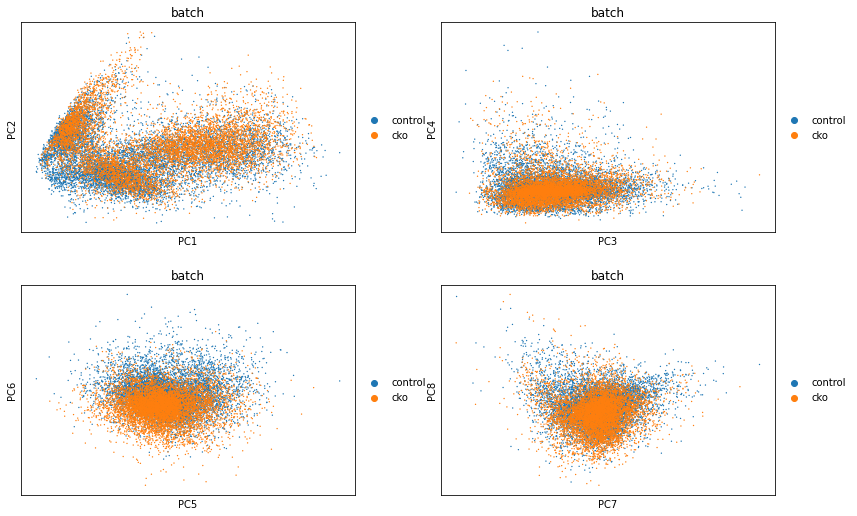

In [27]:
sc.pl.pca(ad_all, color='batch',components = ['1,2','3,4','5,6','7,8'], ncols=2)

## PCA analysis for slc18a3 cells

In [28]:
infile = '../so_original/so_ctr.csv'
df_ctr = pd.read_csv(infile, index_col=0).T

infile = '../so_original/so_cko.csv'
df_cko = pd.read_csv(infile, index_col=0).T

In [29]:
df_ctr.head()

,Xkr4,Mrpl15,Lypla1,Gm37988,Tcea1,Rgs20,Atp6v1h,Oprk1,Npbwr1,Rb1cc1,...,Sec31b,Gm20395,Pitx3,Gm26792,Gm6970,Tectb,Habp2,Vwa2,E330013P04Rik,AC132444.6
s1_AAACCTGAGCATCATC,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
s1_AAACCTGGTAGCCTCG,0,1,0,0,1,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
s1_AAACCTGGTCTAGTCA,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
s1_AAACCTGGTGTTAAGA,0,2,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
s1_AAACGGGAGCTCCCAG,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
df_cko.head()

,Xkr4,Mrpl15,Lypla1,Tcea1,Rgs20,Atp6v1h,Oprk1,Npbwr1,Rb1cc1,4732440D04Rik,...,mt-Nd6,mt-Cytb,Vamp7,Spry3,Tmlhe,AC132444.6,AC168977.1,PISD,DHRSX,CAAA01147332.1
AAACCTGAGGAATTAC,0,0,0,0,0,1,0,0,0,0,...,0,38,1,0,0,0,0,2,1,0
AAACCTGAGGCTCTTA,0,0,0,1,0,1,0,0,1,0,...,0,39,2,0,0,0,0,0,0,0
AAACCTGCAGGATCGA,0,2,1,1,0,0,0,0,1,0,...,0,82,0,0,0,0,0,2,0,0
AAACCTGGTACCGCTG,0,0,3,3,0,0,0,0,1,1,...,0,96,1,0,0,0,0,3,1,0
AAACCTGGTAGAAGGA,0,1,0,0,0,0,0,0,0,0,...,0,52,0,0,0,0,0,3,0,0


In [31]:
ad_cko = anndata.AnnData(df_cko)

In [32]:
infile = '../so_original/so_ctr_celltype.csv'
df_ctr_obs = pd.read_csv(infile, index_col=0)

infile = '../so_original/so_cko_celltype.csv'
df_cko_obs = pd.read_csv(infile, index_col=0)

In [33]:
df_cko_obs.head()

,celltype
barcode,
AAACCTGAGGAATTAC,PGC.Isl1-
AAACCTGAGGCTCTTA,nbMN
AAACCTGCAGGATCGA,PGC.Isl1-
AAACCTGGTACCGCTG,LMCm
AAACCTGGTAGAAGGA,PGC.Isl1-


In [34]:
df_ctr_obs.head()

,celltype
barcode,
s1_AAACCTGAGCATCATC,LMCm
s1_AAACCTGGTAGCCTCG,MMC
s1_AAACCTGGTCTAGTCA,V2IN
s1_AAACCTGGTGTTAAGA,V3IN
s1_AAACGGGAGCTCCCAG,PGC.Isl1-


In [35]:
ad_ctr = anndata.AnnData(X=df_ctr, obs=df_ctr_obs)
ad_cko = anndata.AnnData(X=df_cko, obs=df_cko_obs)

In [36]:
ad_ctr

AnnData object with n_obs × n_vars = 3020 × 17774
    obs: 'celltype'

In [37]:
ad_cko

AnnData object with n_obs × n_vars = 3278 × 17156
    obs: 'celltype'

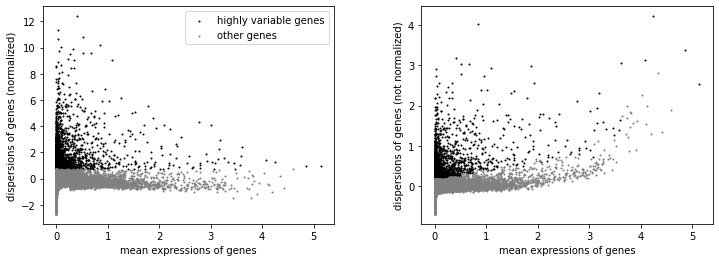

In [38]:
adata = ad_ctr
sc.pp.normalize_total(adata, target_sum=10000)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, min_disp=0.3,inplace=True, n_top_genes=2000)
sc.pl.highly_variable_genes(adata)
sc.pp.scale(adata, max_value=10)
ad_ctr = None
ad_ctr = adata.copy()

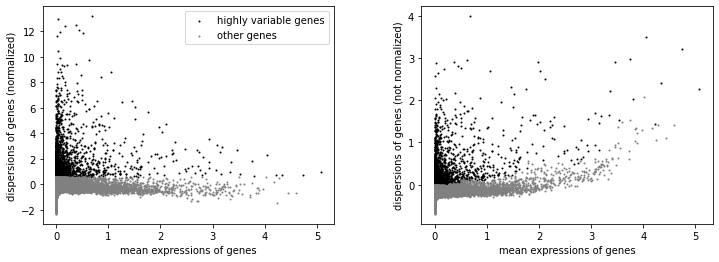

In [39]:
adata = ad_cko
sc.pp.normalize_total(adata, target_sum=10000)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, min_disp=0.3,inplace=True, n_top_genes=2000)
sc.pl.highly_variable_genes(adata)
sc.pp.scale(adata, max_value=10)
ad_cko = None
ad_cko = adata.copy()

In [40]:
ad_ctr

AnnData object with n_obs × n_vars = 3020 × 17774
    obs: 'celltype'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg'

In [41]:
ad_cko

AnnData object with n_obs × n_vars = 3278 × 17156
    obs: 'celltype'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg'

In [42]:
ad_all = ad_ctr.concatenate(ad_cko, batch_categories=['control','cko'])

In [43]:
categories = ['pMN', 'nbMN', 'MMC', 'HMC', 'LMCm', 'LMCl', 'PGC.Isl1+', 'PGC.Isl1-', 'V2IN', 'V3IN', 'ND']
ad_all.obs['celltype'] = pd.Categorical(ad_all.obs['celltype'], ordered=True, categories=categories)
ad_all.uns['celltype_colors'] = ['#027222', '#00FF00', '#e87929', '#774507', '#800080', '#f97a91', '#0021ff', '#add8e6', '#ccccce', '#6a6a6d', '#070707']

In [44]:
ad_all

AnnData object with n_obs × n_vars = 6298 × 17156
    obs: 'celltype', 'batch'
    var: 'highly_variable-cko', 'means-cko', 'dispersions-cko', 'dispersions_norm-cko', 'mean-cko', 'std-cko', 'highly_variable-control', 'means-control', 'dispersions-control', 'dispersions_norm-control', 'mean-control', 'std-control'
    uns: 'celltype_colors'

In [45]:
ad_all.shape

(6298, 17156)

In [46]:
sc.tl.pca(ad_all)

In [47]:
ad_all

AnnData object with n_obs × n_vars = 6298 × 17156
    obs: 'celltype', 'batch'
    var: 'highly_variable-cko', 'means-cko', 'dispersions-cko', 'dispersions_norm-cko', 'mean-cko', 'std-cko', 'highly_variable-control', 'means-control', 'dispersions-control', 'dispersions_norm-control', 'mean-control', 'std-control'
    uns: 'celltype_colors', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [48]:
ad_all.varm['PCs'].shape

(17156, 50)

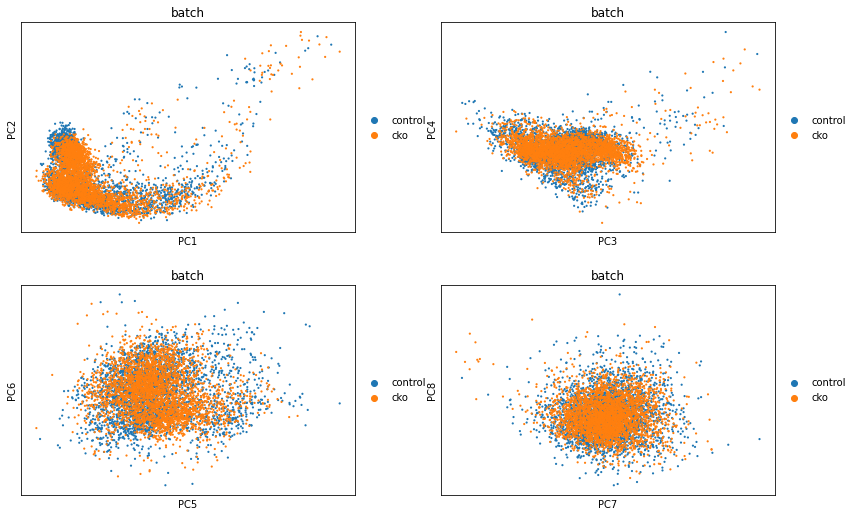

In [49]:
outimg = '_rep2_combine_batch.pdf'
sc.pl.pca(ad_all, color='batch', components = ['1,2','3,4','5,6','7,8'], ncols=2, save=outimg)

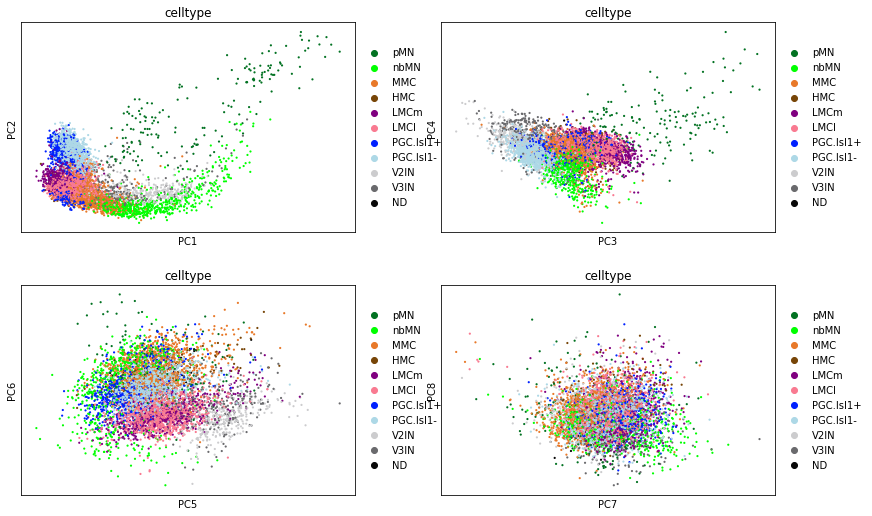

In [50]:
outimg = '_rep2_combine_celltype.pdf'
sc.pl.pca(ad_all, color='celltype', components = ['1,2','3,4','5,6','7,8'], ncols=2, save=outimg)

In [63]:
ad_cko

AnnData object with n_obs × n_vars = 3278 × 17156
    obs: 'celltype'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg'

In [64]:
ad_cko

AnnData object with n_obs × n_vars = 3278 × 17156
    obs: 'celltype'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg'

In [70]:
categories = ['pMN', 'nbMN', 'MMC', 'LMCm', 'LMCl', 'PGC.Isl1+', 'PGC.Isl1-', 'V2IN', 'V3IN']
ad_cko.obs['celltype'] = pd.Categorical(ad_cko.obs['celltype'], ordered=True, categories=categories)
ad_cko.uns['celltype_colors'] = ['#027222', '#00FF00', '#e87929', '#800080', '#f97a91', '#0021ff', '#add8e6', '#ccccce', '#6a6a6d']

In [71]:
ad_cko.obs.celltype.cat.categories

Index(['pMN', 'nbMN', 'MMC', 'LMCm', 'LMCl', 'PGC.Isl1+', 'PGC.Isl1-', 'V2IN',
       'V3IN'],
      dtype='object')

/home/groups/precepts/chhy/anaconda3/envs/cuda_11/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/groups/precepts/chhy/anaconda3/envs/cuda_11/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


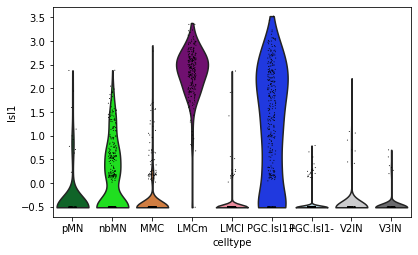

In [72]:
sc.pl.violin(ad_cko, keys=['Isl1'], groupby='celltype')

/home/groups/precepts/chhy/anaconda3/envs/cuda_11/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/groups/precepts/chhy/anaconda3/envs/cuda_11/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


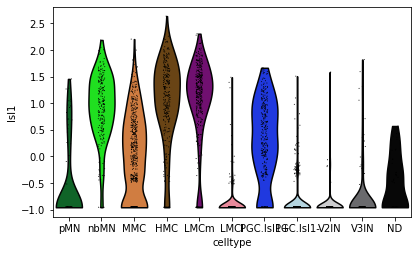

In [69]:
sc.pl.violin(ad_ctr, keys=['Isl1'], groupby='celltype')

### Using bbknn

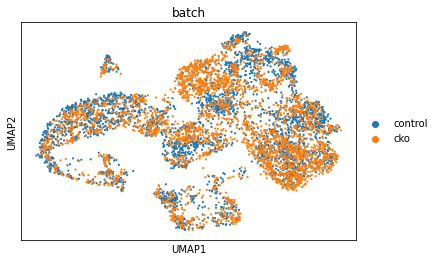

In [39]:
sc.tl.pca(ad_all)
sc.external.pp.bbknn(ad_all, metric='angular')
sc.tl.umap(ad_all, random_state=42)
#sc.tl.leiden(adata, resolution=0.5, random_state=seed)
outimg = '_rep2_combine_batch_bbknn.pdf'
sc.pl.umap(ad_all, color='batch', save=outimg)

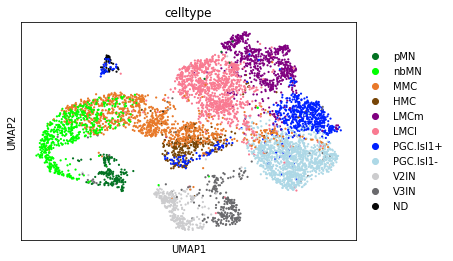

In [40]:
outimg = '_rep2_combine_celltype_bbknn.pdf'
sc.pl.umap(ad_all, color='celltype', save=outimg)

## Using neighbors

In [24]:
sc.pp.neighbors(ad_all)
sc.tl.umap(ad_all)

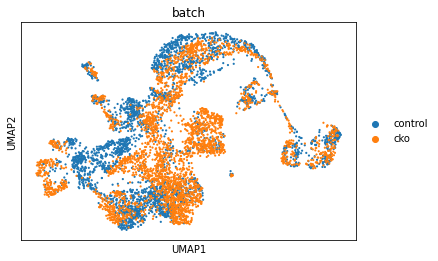

In [25]:
outimg = '_rep2_combine_batch.svg'
sc.pl.umap(ad_all, color='batch', save=outimg)

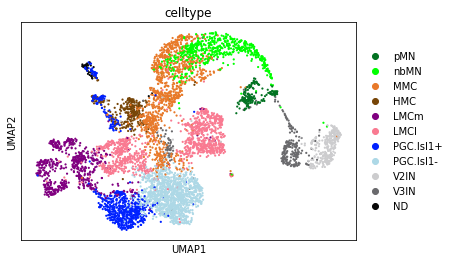

In [26]:
outimg = '_rep2_combine_celltype.pdf'
sc.pl.umap(ad_all, color='celltype', save=outimg)

In [27]:
ad_all

AnnData object with n_obs × n_vars = 6298 × 17156
    obs: 'celltype', 'batch'
    var: 'highly_variable-cko', 'means-cko', 'dispersions-cko', 'dispersions_norm-cko', 'mean-cko', 'std-cko', 'highly_variable-control', 'means-control', 'dispersions-control', 'dispersions_norm-control', 'mean-control', 'std-control'
    uns: 'celltype_colors', 'pca', 'batch_colors', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [28]:
ctr = ad_all[ad_all.obs.batch=='control',:]
cko = ad_all[ad_all.obs.batch=='cko',:]

/home/groups/precepts/chhy/anaconda3/envs/cuda_11/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


In [29]:
sc.pp.neighbors(ctr)
sc.tl.umap(ctr)

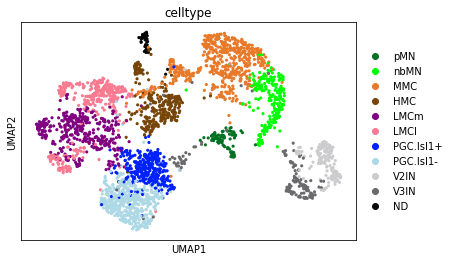

In [30]:
outimg = '_rep2_control.svg'
sc.pl.umap(ctr, color='celltype', save=outimg)

In [31]:
sc.pp.neighbors(cko)
sc.tl.umap(cko)

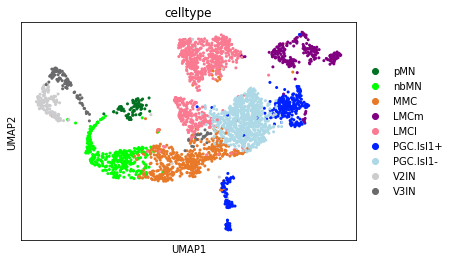

In [32]:
outimg = '_rep2_ko.svg'
sc.pl.umap(cko, color='celltype', save=outimg)

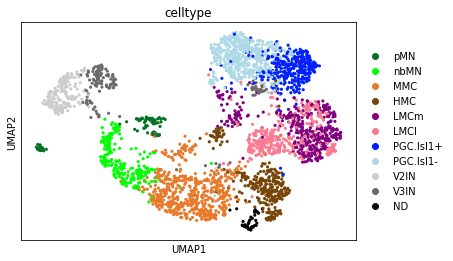

In [52]:
sc.tl.pca(ctr, n_comps=15)
sc.pp.neighbors(ctr)
sc.tl.umap(ctr)
outimg = '_rep2_control_pc10.svg'
sc.pl.umap(ctr, color='celltype', save=outimg)

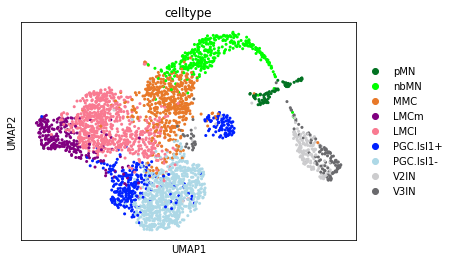

In [54]:
sc.tl.pca(cko, n_comps=10)
sc.pp.neighbors(cko)
sc.tl.umap(cko)
outimg = '_rep2_control_pc10.svg'
sc.pl.umap(cko, color='celltype', save=outimg)

In [51]:
ctr

AnnData object with n_obs × n_vars = 3020 × 17156
    obs: 'celltype', 'batch'
    var: 'highly_variable-cko', 'means-cko', 'dispersions-cko', 'dispersions_norm-cko', 'mean-cko', 'std-cko', 'highly_variable-control', 'means-control', 'dispersions-control', 'dispersions_norm-control', 'mean-control', 'std-control'
    uns: 'celltype_colors', 'pca', 'batch_colors', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [39]:
ctr.obsm['X_pca'].shape

(3020, 50)

In [40]:
ctr.varm['PCs'].shape

(17156, 50)

In [37]:
sc.tl.umap?

Signature:
sc.tl.umap(
    adata: anndata._core.anndata.AnnData,
    min_dist: float = 0.5,
    spread: float = 1.0,
    n_components: int = 2,
    maxiter: Union[int, NoneType] = None,
    alpha: float = 1.0,
    gamma: float = 1.0,
    negative_sample_rate: int = 5,
    init_pos: Union[Literal['paga', 'spectral', 'random'], numpy.ndarray, NoneType] = 'spectral',
    random_state: Union[NoneType, int, numpy.random.mtrand.RandomState] = 0,
    a: Union[float, NoneType] = None,
    b: Union[float, NoneType] = None,
    copy: bool = False,
    method: Literal['umap', 'rapids'] = 'umap',
    neighbors_key: Union[str, NoneType] = None,
) -> Union[anndata._core.anndata.AnnData, NoneType]
Docstring:
Embed the neighborhood graph using UMAP [McInnes18]_.

UMAP (Uniform Manifold Approximation and Projection) is a manifold learning
technique suitable for visualizing high-dimensional data. Besides tending to
be faster than tSNE, it optimizes the embedding such that it best reflects
the topology o

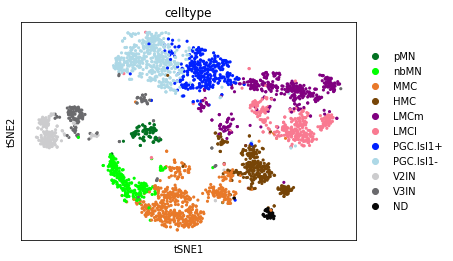

In [111]:
sc.tl.tsne(ctr)
outimg = '_rep2_ctr.svg'
sc.pl.tsne(ctr, color='celltype', save=outimg)

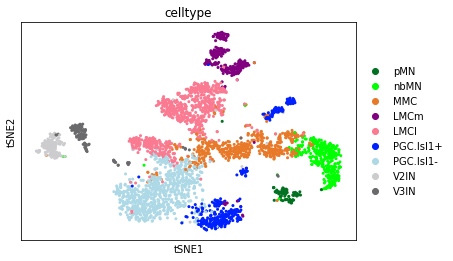

In [112]:
sc.tl.tsne(cko)
outimg = '_rep2_ko.svg'
sc.pl.tsne(cko, color='celltype', save=outimg)